<a href="https://colab.research.google.com/github/Indiranafa/Machine-Learning/blob/main/TG7_2341720001_INDIRA_NAFA_AURAH_HUDA_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##PRAKTIKUM 1

In [ ]:
# import package
import numpy as np
import pandas as pd

In [ ]:
# baca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Kebutuhan smt 5/dataset.csv')

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


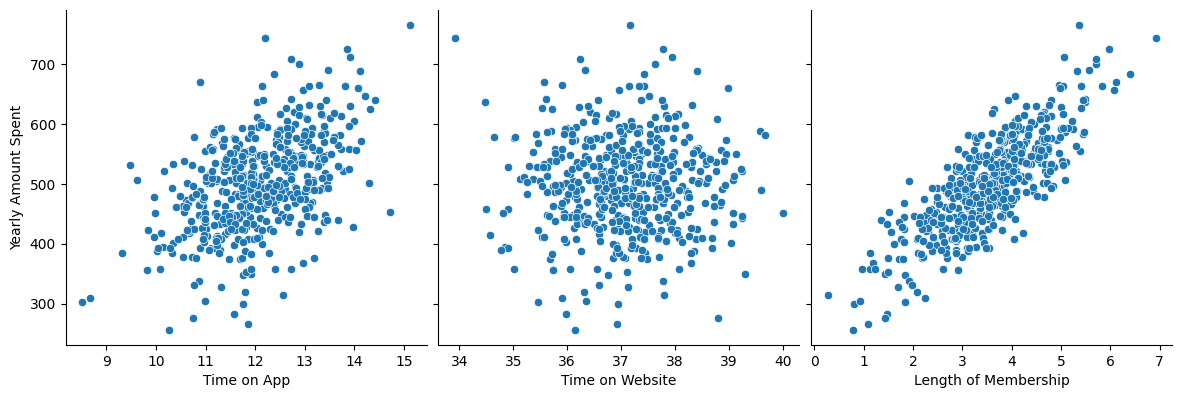

In [ ]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

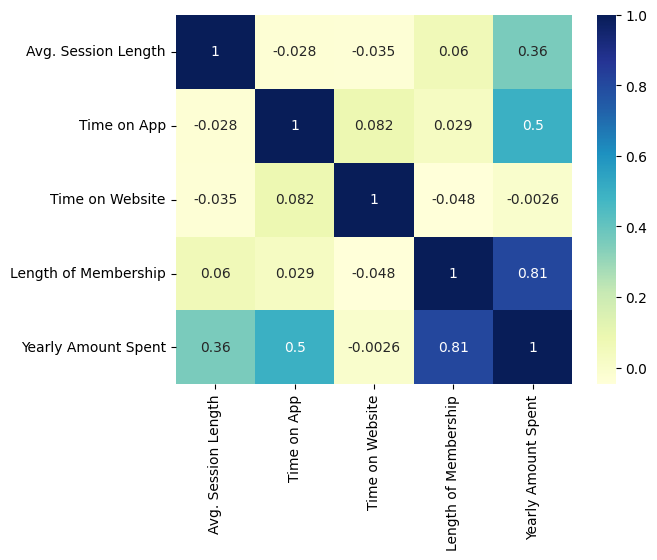

In [ ]:
# visualisasi korelasi dengan heatmap
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [ ]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

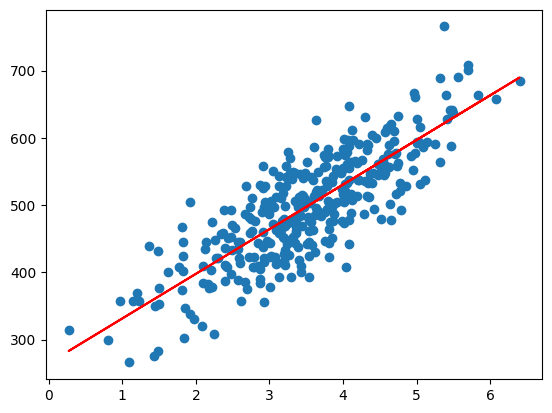

In [ ]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

In [ ]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

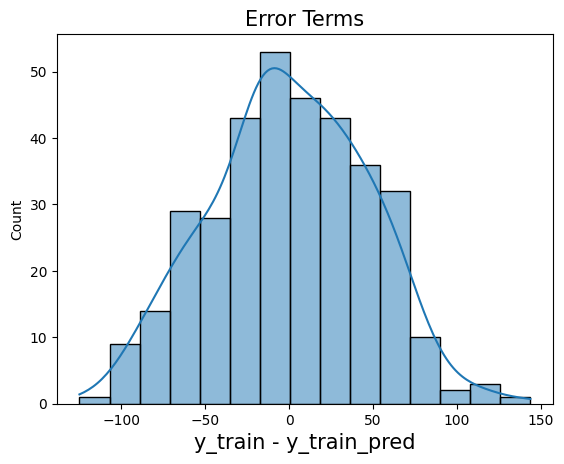

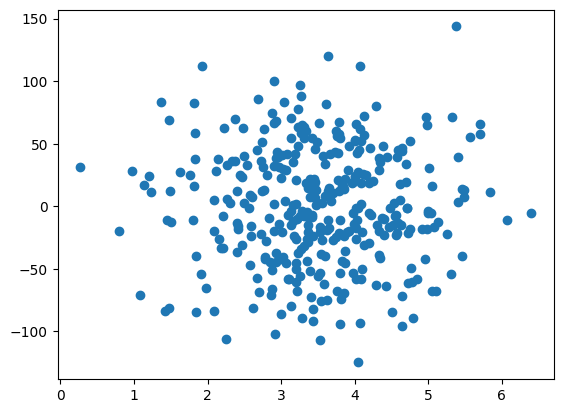

In [ ]:
# Histogram residual
fig = plt.figure()
sns.histplot(res, bins=15, kde=True)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

In [ ]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [ ]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

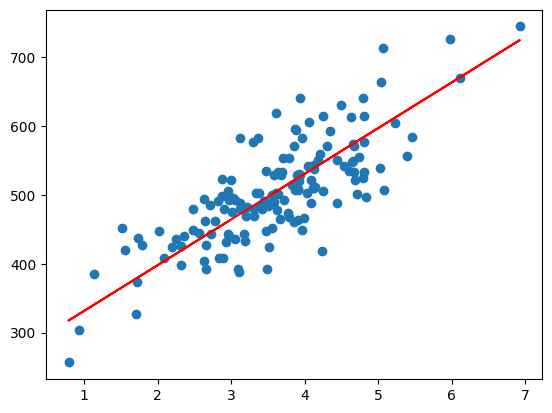

In [ ]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

##PRAKTIKUM 2

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/drive/MyDrive/Kebutuhan smt 5/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


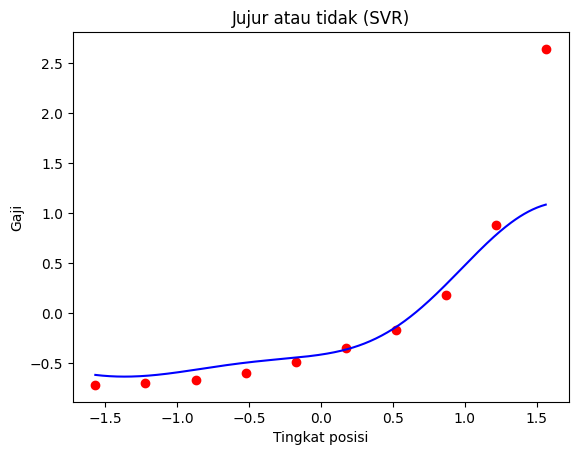

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


**Evaluasi Model SVR**

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


##PRAKTIKUM 3

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Kebutuhan smt 5/iris.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Eksplorasi Data
data.info()
data.describe()
data['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
species,
setosa,50
versicolor,50
virginica,50


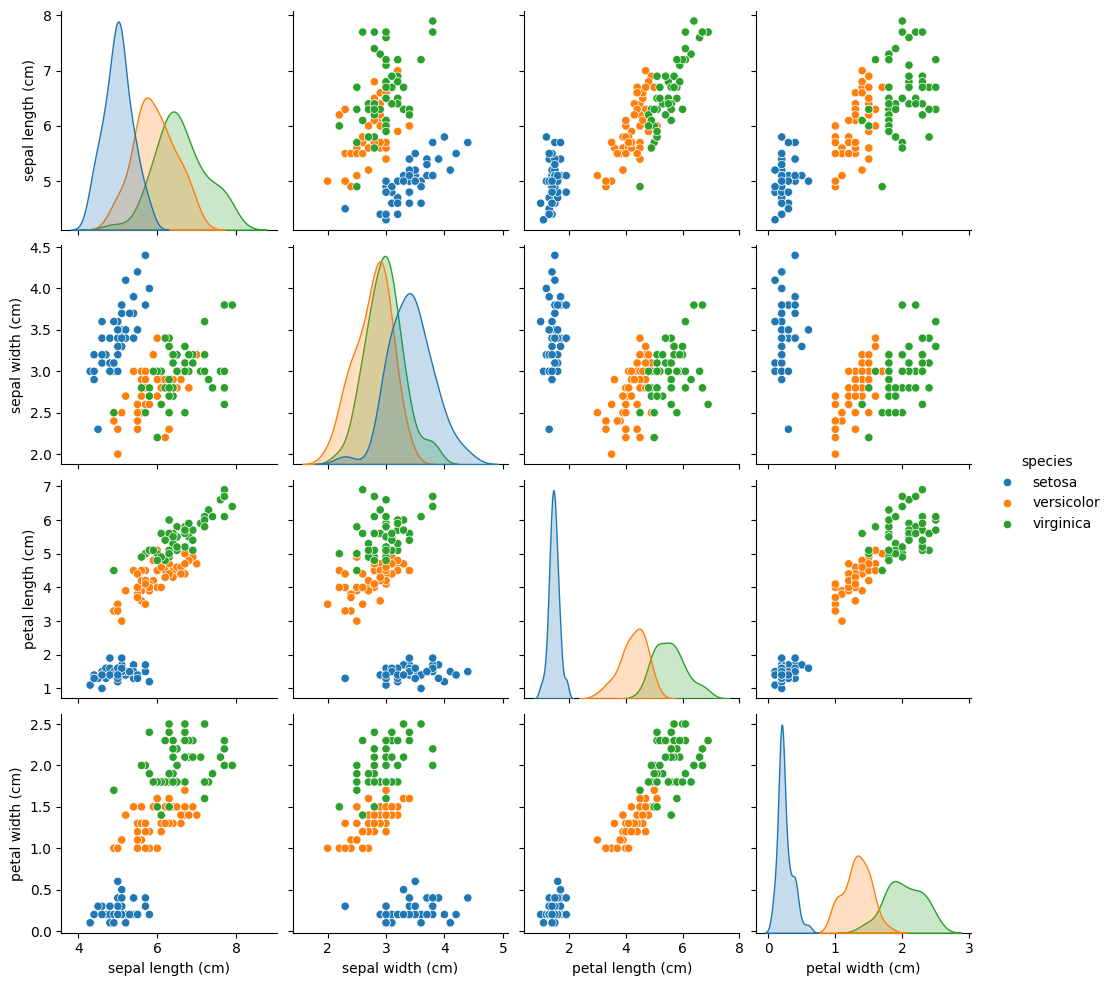

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='species')
plt.show()

In [ ]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]   # semua kolom kecuali label
y = data.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Implementasi Algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Prediksi dan Evaluasi Akurasi KNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



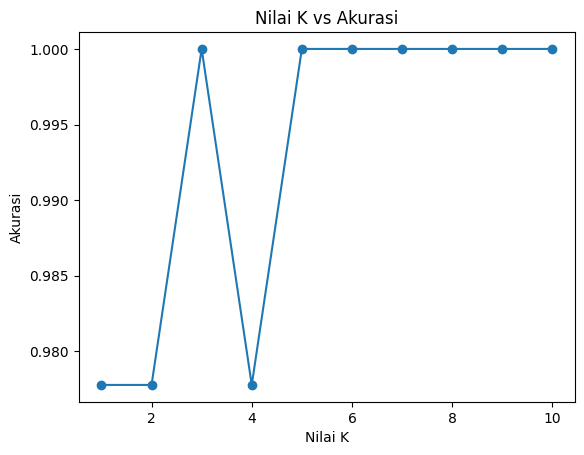

In [ ]:
# Menentukan Nilai K Terbaik
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()

**Analisis Hasil Praktikum 3 (KNN)**

1.  **Nilai K dengan akurasi tertinggi:**
    Berdasarkan plot "Nilai K vs Akurasi", akurasi tertinggi (1.0) dicapai pada nilai K antara 1 hingga 6. Setelah nilai K=6, akurasi cenderung menurun atau tetap.

2.  **Perubahan akurasi ketika K dinaikkan:**
    Hasil akurasi tetap tinggi (1.0) untuk rentang nilai K dari 1 hingga 6. Namun, ketika K terus dinaikkan di atas 6, akurasi mulai menurun, menunjukkan bahwa memilih nilai K yang terlalu besar dapat mengurangi kinerja model pada dataset ini.

3.  **Pengaruh normalisasi terhadap hasil prediksi:**
    Normalisasi (menggunakan `StandardScaler`) sangat penting dalam algoritma KNN. KNN menghitung jarak antara titik data, dan fitur dengan skala yang lebih besar akan mendominasi perhitungan jarak jika tidak dinormalisasi. Dengan normalisasi, semua fitur memiliki skala yang serupa, memastikan bahwa setiap fitur berkontribusi secara proporsional pada perhitungan jarak dan meningkatkan akurasi model. Dalam kasus ini, normalisasi membantu mencapai akurasi 1.0 untuk rentang nilai K yang optimal.

##PRAKTIKUM 4

In [ ]:
# Mendefinisikan Data Dummy
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 61 156]
 [ 30 164]
 [ 75  81]
 [103  90]
 [ 38 144]
 [ 59 124]
 [100 137]
 [ 56 112]
 [162  54]
 [149   2]
 [121 123]
 [112 123]
 [114 173]
 [125  18]
 [198  25]
 [123  13]
 [100 182]
 [118  67]
 [ 74  22]
 [ 81  36]
 [ 79 234]
 [ 62 123]
 [ 62  28]
 [134 224]
 [184 293]
 [229 136]
 [158 112]
 [148  97]
 [159  98]
 [138 134]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [ ]:
# Membuat Data Frame
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,61,156,0
1,30,164,0
2,75,81,0
3,103,90,0
4,38,144,0


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,61,156,Kelas B
1,30,164,Kelas B
2,75,81,Kelas B
3,103,90,Kelas B
4,38,144,Kelas B


/tmp/ipython-input-2329293369.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-2329293369.py:13: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


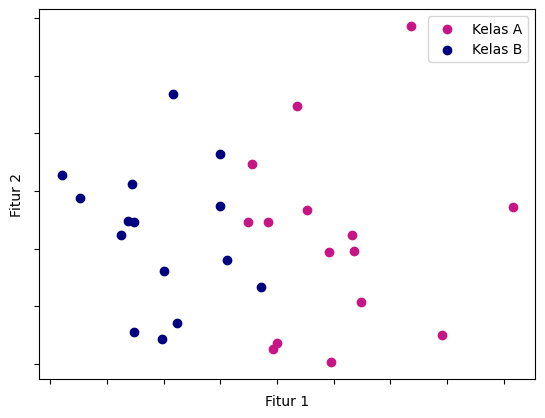

In [ ]:
# Visualisasi Data
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [ ]:
# Klasifikasi Multinominal Naive Bayes
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.8888888888888888


In [ ]:
# Klasifikasi Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.9523809523809523
Hasil akurasi data test (Gaussian): 1.0


##PRAKTIKUM 5

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Kebutuhan smt 5/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Evaluasi model

### Subtask:
Mengevaluasi kinerja model dengan metrik seperti R-squared, MSE, dan MAE.

**Reasoning**:
Menghitung dan mencetak nilai MAE, MSE, dan R-squared untuk mengevaluasi kinerja model regresi.

## Analisis hasil

### Subtask:
Menganalisis hasil evaluasi dan menyajikan temuan.

## Summary:

### Data Analysis Key Findings

* Sekitar 78% variabilitas biaya medis personal dapat dijelaskan oleh variabel-variabel prediktor dalam model, ditunjukkan oleh nilai R-squared sebesar 0.78.
* Rata-rata, prediksi biaya medis oleh model menyimpang sekitar \$4181.19 dari nilai sebenarnya, berdasarkan nilai Mean Absolute Error (MAE) sebesar 4181.19.
* Nilai Mean Squared Error (MSE) sebesar 33596915.85 memberikan gambaran tentang rata-rata kuadrat kesalahan, yang menunjukkan bobot lebih pada kesalahan yang lebih besar dibandingkan MAE.

### Insights or Next Steps

* Meskipun R-squared 0.78 menunjukkan kinerja model yang cukup baik, MAE sebesar \$4181.19 mengindikasikan bahwa masih ada ruang untuk peningkatan dalam akurasi prediksi.
* Analisis lebih lanjut dapat dilakukan untuk mengidentifikasi variabel prediktor mana yang paling signifikan mempengaruhi biaya medis (misalnya, merokok kemungkinan besar merupakan faktor kuat berdasarkan konteks data asuransi kesehatan) dan mempertimbangkan model yang lebih kompleks atau teknik *feature engineering* tambahan.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Hitung MSE
mse = mean_squared_error(y_test, y_pred)

# Hitung R-squared
r2 = r2_score(y_test, y_pred)

# Cetak hasil evaluasi
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
R-squared: 0.78


## Prediksi

### Subtask:
Melakukan prediksi menggunakan model yang telah dilatih pada data pengujian.

**Reasoning**:
Melakukan prediksi pada data pengujian menggunakan model Multiple Linear Regression yang telah dilatih.

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = model_lr.predict(X_test)

# Tampilkan beberapa hasil prediksi awal
print("Beberapa hasil prediksi pada data pengujian:")
print(y_pred[:10])

Beberapa hasil prediksi pada data pengujian:
[ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656 10864.11316424   170.28084136 16903.45028662
  1092.43093614 11218.34318352]


## Pembuatan dan pelatihan model

### Subtask:
Membuat dan melatih model Multiple Linear Regression menggunakan Scikit-Learn.

**Reasoning**:
Membuat objek model Multiple Linear Regression dan melatihnya menggunakan data pelatihan.

In [ ]:
from sklearn.linear_model import LinearRegression

# Buat objek LinearRegression
model_lr = LinearRegression()

# Latih model menggunakan data pelatihan
model_lr.fit(X_train, y_train)

LinearRegression()

## Pembagian data

### Subtask:
Membagi data menjadi set pelatihan dan pengujian.

**Reasoning**:
Separate the features and the target variable, then split the data into training and testing sets using train_test_split with an 80/20 split and a random state for reproducibility. Finally, print the shapes of the resulting sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (variabel independen) dan label (variabel dependen)
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

# Bagi data menjadi set pelatihan dan pengujian (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cetak bentuk (shape) dari masing-masing set data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


## Pra-pemrosesan data

### Subtask:
Menangani variabel kategorikal dengan one-hot encoding.

**Reasoning**:
The subtask is to handle categorical variables using one-hot encoding. This involves creating dummy variables for 'sex', 'smoker', and 'region', combining them with the original dataframe, and then dropping the original categorical columns.

In [ ]:
# Lakukan one-hot encoding pada kolom kategorikal 'sex', 'smoker', dan 'region'
sex_dummies = pd.get_dummies(df_insurance['sex'], prefix='sex', drop_first=True)
smoker_dummies = pd.get_dummies(df_insurance['smoker'], prefix='smoker', drop_first=True)
region_dummies = pd.get_dummies(df_insurance['region'], prefix='region', drop_first=True)

# Gabungkan hasil one-hot encoding dengan DataFrame df_insurance yang asli
df_processed = pd.concat([df_insurance, sex_dummies, smoker_dummies, region_dummies], axis=1)

# Hapus kolom kategorikal asli ('sex', 'smoker', 'region')
df_processed = df_processed.drop(['sex', 'smoker', 'region'], axis=1)

# Tampilkan beberapa baris data yang telah diproses
df_processed.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Inspeksi Data
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [ ]:
# Encode Label
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Memisahkan Fitur dengan Label
X = df['SMS'].values
y = df['Labels'].values

In [ ]:
# Ekstraksi Fitur
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


In [ ]:
# Training dan Evaluasi Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


**TUGAS PRAKTIKUM 1**

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Kebutuhan smt 5/insurance.csv')

# Menampilkan 5 data awal untuk identifikasi variabel
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = data.drop('charges', axis=1)
y = data['charges']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((1070, 6), (268, 6))

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Preprocessing: scaling & encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

Dataset Medical Cost Personal Dataset berisi informasi mengenai biaya medis personal berdasarkan beberapa faktor kondisi seseorang. Tiap baris dalam dataset mewakili satu pasien. Variabel-variabel yang digunakan yaitu:

age → usia seseorang

sex → jenis kelamin (male/female)

bmi → Body Mass Index, menggambarkan tingkat kegemukan

children → jumlah anak yang ditanggung dalam asuransi

smoker → status perokok (yes/no)

region → wilayah tempat tinggal (northeast, northwest, southeast, southwest)

charges → biaya medis personal yang harus dibayar pasien
(menjadi variabel target yang akan kita prediksi)

Tujuan penggunaan dataset ini adalah untuk melihat faktor apa yang berpengaruh pada biaya medis, serta membangun model untuk memprediksi biaya tersebut.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Buat model menggunakan pipeline
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
# Train model pada data latih
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

R-Squared : 0.7835929767120723
MSE : 33596915.85136146
MAE : 4181.194473753649


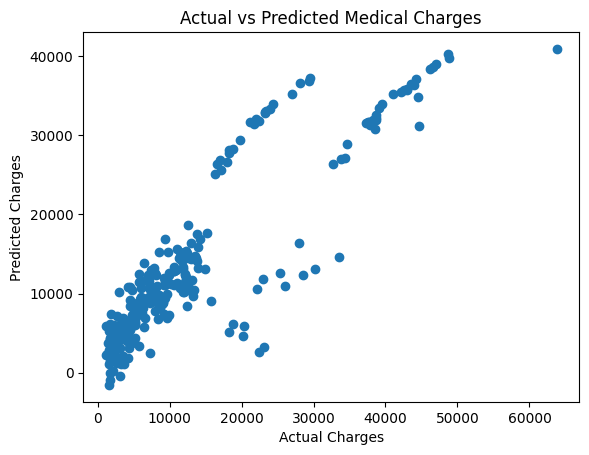

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Evaluasi model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-Squared :", r2)
print("MSE :", mse)
print("MAE :", mae)

# Visualisasi Prediksi vs Data Asli
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()

Model menghasilkan nilai evaluasi sebagai berikut:

R-Squared = 0.7836

MSE = 33,596,915.85

MAE = 4,181.19

Interpretasi:

R-Squared = 0.78
Artinya, sekitar 78% variasi biaya medis (charges) dapat dijelaskan oleh variabel-variabel pada model (usia, BMI, status merokok, dll). Nilai ini cukup baik untuk kasus data dunia nyata yang variabilitasnya tinggi.

**MAE & MSE**

MAE menunjukkan rata-rata selisih prediksi dengan nilai asli adalah sekitar 4181 dolar

MSE bernilai besar karena satuan biaya medis juga cukup besar (hingga puluhan ribu dolar)

Model sudah lumayan tepat, tapi masih ada beberapa kesalahan terutama pada data biaya yang sangat tinggi.

In [ ]:
# ========== 0. Persiapan ==========
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# supaya plot tampil rapi
sns.set(style="whitegrid")

1. Identifikasi Variabel

Pada tahap ini, dataset insurance.csv dimuat dan dilakukan pemilihan variabel. Variabel target yang diprediksi adalah charges yaitu biaya medis yang harus dibayarkan oleh masing-masing pasien. Sementara itu, variabel bebas yang digunakan meliputi age, bmi, children, sex, smoker, dan region. Variabel kategorikal seperti sex, smoker, dan region kemudian dilakukan encoding agar dapat diolah dalam model machine learning.

In [ ]:
# ========== 1. Baca data ==========
df = pd.read_csv('/content/drive/MyDrive/Kebutuhan smt 5/insurance.csv')   # pastikan file ada di folder kerja
display(df.head())
print("Shape:", df.shape)
print(df.info())
print(df.describe())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000 

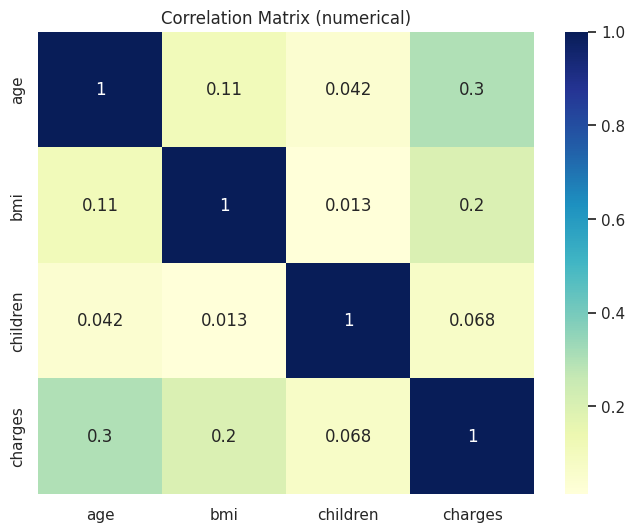

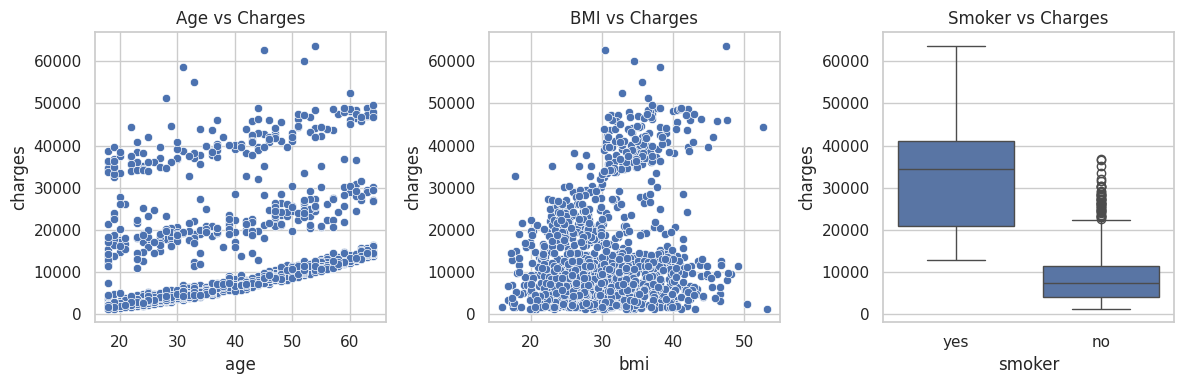

In [ ]:
# ========== 2. Eksplorasi singkat ==========
# Korelasi numerik
plt.figure(figsize=(8,6))

# Select only numerical columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix (numerical)')
plt.show()

# Some scatter plots for important relationships
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.subplot(1,3,2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.subplot(1,3,3)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.tight_layout()
plt.show()

In [ ]:
# ========== 3. Siapkan fitur (X) dan target (y) ==========
X = df.drop(columns=['charges'])
y = df['charges']

2. Feature Scaling

Karena terdapat fitur numerik seperti age, bmi, dan children, proses StandardScaler digunakan untuk melakukan normalisasi agar semua fitur berada pada skala yang seimbang. Proses ini penting terutama untuk model seperti SVR yang sensitif terhadap perbedaan skala antar fitur. Sementara itu, fitur kategorikal diberikan proses OneHotEncoding untuk mengubahnya menjadi bentuk numerik.

In [ ]:
# ========== 4. Preprocessing: one-hot untuk kategorikal + scaling untuk numerik ==========
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

num_transformer = Pipeline([
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

3. Pembagian Dataset Train & Test

Setelah variabel ditentukan, data kemudian dibagi menjadi 70% sebagai data latih (train) dan 30% sebagai data uji (test) menggunakan fungsi train_test_split. Pembagian ini bertujuan agar model dapat menyesuaikan pola dari data latih dan diuji kemampuannya dalam memprediksi data baru pada data uji yang belum pernah dilihat sebelumnya.

In [ ]:
# ========== 5. Bagi data train/test ==========
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (936, 6) Test: (402, 6)


4. Pembuatan model Multiple Linear Regression

Model Multiple Linear Regression dibuat menggunakan pipeline yang berisi preprocessing dan model regresi. Model ini bertujuan untuk mempelajari hubungan linier antara variabel bebas dan biaya medis sehingga dapat memprediksi biaya berdasarkan karakteristik pasien.

In [ ]:
# ========== 6A. Pipeline & Latih Multiple Linear Regression ==========
pipe_lr = Pipeline([
    ('preproc', preprocessor),
    ('lr', LinearRegression())
])

pipe_lr.fit(X_train, y_train)

# Prediksi & evaluasi
y_pred_train_lr = pipe_lr.predict(X_train)
y_pred_test_lr  = pipe_lr.predict(X_test)

def eval_reg(y_true, y_pred, label="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"=== Evaluasi ({label}) ===")
    print(f"MAE:  {mae:.3f}")
    print(f"MSE:  {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R2:   {r2:.3f}")
    print()

eval_reg(y_train, y_pred_train_lr, "LinearRegression - Train")
eval_reg(y_test,  y_pred_test_lr,  "LinearRegression - Test")

=== Evaluasi (LinearRegression - Train) ===
MAE:  4251.256
MSE:  37730549.724
RMSE: 6142.520
R2:   0.742

=== Evaluasi (LinearRegression - Test) ===
MAE:  4145.451
MSE:  33780509.575
RMSE: 5812.100
R2:   0.770



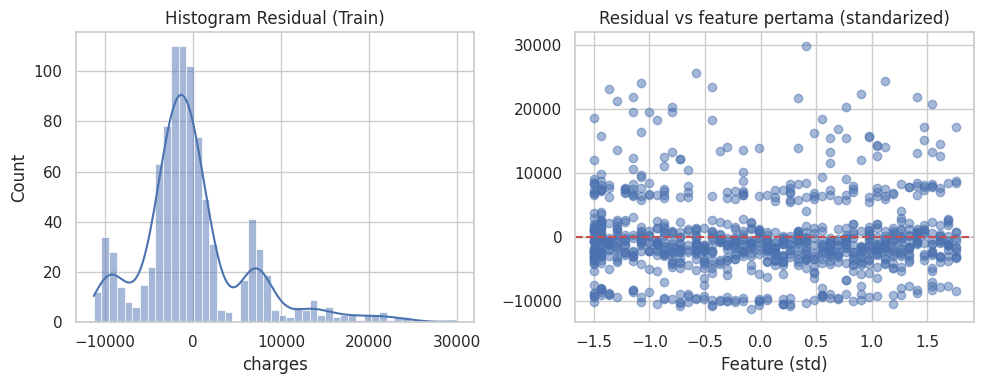

In [ ]:
# Residual analysis (Linear Regression)
res_train = y_train - y_pred_train_lr

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(res_train, kde=True)
plt.title('Histogram Residual (Train)')

plt.subplot(1,2,2)
plt.scatter(pipe_lr.named_steps['preproc'].transform(X_train)[:,0], res_train, alpha=0.5)
plt.title('Residual vs feature pertama (standarized)')
plt.xlabel('Feature (std)')
plt.axhline(0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

5. Pelatihan model dan prediksi

Model dilatih menggunakan data latih (X_train, y_train). Setelah pelatihan selesai, model digunakan untuk memprediksi biaya medis pada data uji (X_test). Hasil prediksi ini dibandingkan dengan nilai sebenarnya untuk mengetahui performa model.

Selain itu, dilakukan juga pelatihan model SVR (RBF Kernel) dengan GridSearchCV sehingga diperoleh parameter terbaik:
C=100, epsilon=0.5, gamma='scale'

Namun berdasarkan hasil, SVR memberikan performa yang jauh lebih buruk dibanding Linear Regression.

In [ ]:
# ========== 6B. Pipeline & Latih SVR (RBF) ==========
pipe_svr = Pipeline([
    ('preproc', preprocessor),
    ('svr', SVR())
])

# Grid search sederhana untuk hyperparameters
param_grid = {
    'svr__kernel': ['rbf'],
    'svr__C': [1, 10, 100],
    'svr__gamma': ['scale', 0.1, 0.01],
    'svr__epsilon': [0.1, 0.2, 0.5]
}

gs = GridSearchCV(pipe_svr, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print("Best params (SVR):", gs.best_params_)
best_svr = gs.best_estimator_

# Prediksi & evaluasi
y_pred_train_svr = best_svr.predict(X_train)
y_pred_test_svr  = best_svr.predict(X_test)

eval_reg(y_train, y_pred_train_svr, "SVR - Train")
eval_reg(y_test,  y_pred_test_svr,  "SVR - Test")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params (SVR): {'svr__C': 100, 'svr__epsilon': 0.5, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
=== Evaluasi (SVR - Train) ===
MAE:  6438.707
MSE:  147085516.847
RMSE: 12127.882
R2:   -0.004

=== Evaluasi (SVR - Test) ===
MAE:  6237.025
MSE:  143738838.262
RMSE: 11989.113
R2:   0.020



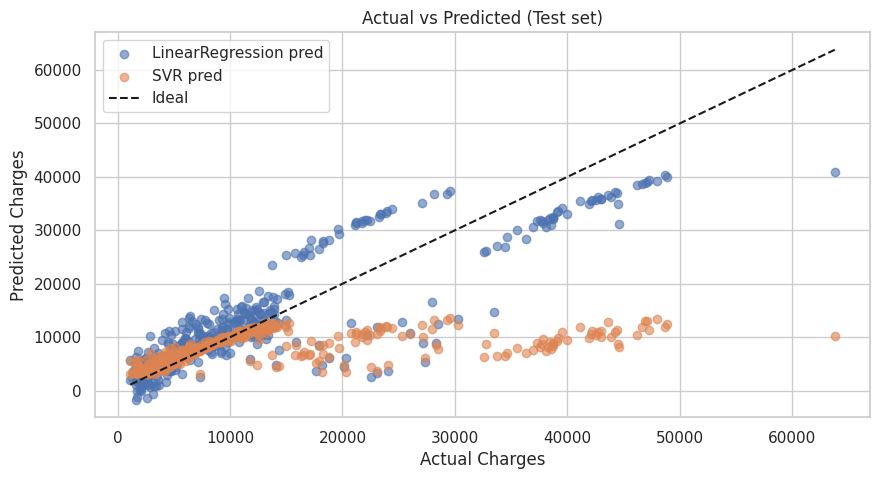

In [ ]:
# Visualisasi perbandingan hasil pada test set
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_lr, label='LinearRegression pred', alpha=0.6)
plt.scatter(y_test, y_pred_test_svr, label='SVR pred', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.title('Actual vs Predicted (Test set)')
plt.show()

In [ ]:
# Feature importance (LinearRegression koefisien) — harus dicocokkan kembali dengan nama kolom hasil one-hot
# Ambil nama fitur hasil preprocessing
# Untuk melihat nama kolom numerik + one-hot encoded:
ohe = pipe_lr.named_steps['preproc'].named_transformers_['cat'].named_steps['onehot']
ohe_names = ohe.get_feature_names_out(cat_features)
feature_names = num_features + list(ohe_names)
coeffs = pipe_lr.named_steps['lr'].coef_

coef_df = pd.DataFrame({'feature': feature_names, 'coef': coeffs})
coef_df = coef_df.sort_values(by='coef', key=abs, ascending=False)
display(coef_df)

,feature,coef
4,smoker_yes,23628.367222
0,age,3688.583190
1,bmi,2090.997834
6,region_southeast,-970.968839
7,region_southwest,-926.322908
2,children,514.023604
5,region_northwest,-486.934610
3,sex_male,104.811823


6. Evaluasi Model

Evaluasi dilakukan menggunakan metrik:
MAE, MSE, RMSE, dan R2 Score

Hasil Model Linear Regression:

Evaluasi	MAE	MSE	RMSE	R²
Train	4251.256	37,730,549.724	6142.520	0.742
Test	4145.451	33,780,509.575	5812.100	0.770

Artinya model cukup baik, dapat menjelaskan 77% variasi biaya medis pada data uji.

Hasil Model SVR:

Evaluasi	MAE	MSE	RMSE	R²
Train	6438.707	147,085,516.847	12127.882	-0.004
Test	6237.025	143,738,838.262	11989.113	0.020

Model sangat buruk, hampir tidak dapat menjelaskan variasi data (R² ≈ 0).